In [97]:
import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [98]:
using CSV
using DataFrames

In [99]:
Pkg.add("Random")
Pkg.add("Distributions")
Pkg.add("Roots")
Pkg.add("Metaheuristics")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [100]:
using Random # for random seeds
using Distributions # statistical distribution interface
using Roots # find zeros of functions
using Metaheuristics # search algorithms
using Plots # plotting

In [101]:
file_path = "change_population_Monday.csv"
df_Mon = CSV.File(file_path)  |> DataFrame

1029×10 DataFrame. Omitted printing of 3 columns
│ Row  │ time    │ stop1   │ stop2   │ stop3   │ stop4   │ stop5   │ stop6   │
│      │ String7 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ 06:11AM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 2    │ 06:12AM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 3    │ 06:13AM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 4    │ 06:14AM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 5    │ 06:15AM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 6    │ 06:16AM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 7    │ 06:17AM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
⋮
│ 1022 │ 11:52PM │ -0.7    │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │
│ 1023 │ 11:53PM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 1024 │ 11:54PM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 1025 │ 11:55PM │ -0.7    │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │
│ 1026 │ 11:56PM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 1027 │ 11:57PM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 1028 │ 11:58PM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │
│ 1029 │ 11:59PM │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │

In [102]:
dict_Mon = Dict{String, Any}()

for row in eachrow(df_Mon)
    time_key = row.time
    temp_matrix = zeros(9, 9)
    temp_positive = zeros(9)
    total_positive = 0
    
    for column in 2:10
        if row[column] > 0
            temp_positive[column - 1] = row[column]
        end
    end
    
    total_positive = sum(temp_positive)
    
    for i in 2:10
        if row[i] < 0
            for j in 2:10
                if row[j] > 0
                    temp_matrix[i-1, j-1] = -row[i] * row[j] / total_positive
                end
            end
        end
    end
    
    entry = (time_key => temp_matrix)  # Creating a key-value pair
    push!(dict_Mon, entry)  # Pushing the key-value pair into the dictionary
end


In [103]:
dict_Mon

Dict{String, Any} with 1029 entries:
  "04:16PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "10:08AM" => [0.0 0.0 … 0.789051 0.0; 0.0 0.0 … 0.343066 0.0; … ; 0.0 0.0 … 0…
  "03:55PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "05:21PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "04:39PM" => [0.0 1.675 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 1.925 … 0.0 0.0…
  "07:22PM" => [0.0 1.92857 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 2.14286 … 0.0…
  "10:49PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "12:42PM" => [0.0 0.25 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.5 … 0.0 0.0; 0…
  "11:57AM" => [0.0 0.425 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.425 … 0.0 0.0…
  "03:47PM" => [0.0 0.0 … 0.0 0.0; 0.333333 0.0 … 0.333333 0.333333; … ; 0.0 0.…
  "12:57PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "08:24PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 

In [104]:
#bus_time = [2, 1, 1, 1, 1, 2, 2, 2, 2]
#walk_time = [4, 4, 3, 4, 5, 3, 3, 8, 7]

In [105]:
function counter_clockwise(matrix)
    new_matrix = zeros(9, 9)
    for i in 2: 9
        for j in 2: 9
            if i < j
                new_matrix[i, j] = matrix[i, j]
            end
        end
    end
    for j in 2: 6
        new_matrix[1, j] = matrix[1, j]
    end
    for i in 7: 9
        new_matrix[i, 1] = matrix[i, 1]
    end
    return new_matrix
end

function clockwise(matrix)
    new_matrix = zeros(9, 9)
    for i in 1: 9
        for j in 1: 9
            if i > j
                new_matrix[i, j] = matrix[i, j]
            end
        end
    end
    for j in 7: 9
        new_matrix[1, j] = matrix[1, j]
    end
    for i in 2: 6
        new_matrix[i, 1] = matrix[i, 1]
    end
    return new_matrix
end

clockwise (generic function with 1 method)

In [106]:
x = dict_Mon["04:39PM"]

9×9 Matrix{Float64}:
 0.0  1.675  0.335  1.005  0.335  1.675  1.675  0.0  0.0
 0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0
 0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0
 0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0
 0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0
 0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0
 0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0
 0.0  1.925  0.385  1.155  0.385  1.925  1.925  0.0  0.0
 0.0  1.425  0.285  0.855  0.285  1.425  1.425  0.0  0.0

In [107]:
dict_Mon_counter_clockwise = Dict{String, Any}()#1,2,3,...,9, 1
dict_Mon_clockwise = Dict{String, Any}()#1,9,8,..., 2, 1
dict_Mon_counter_clockwise = Dict(key => counter_clockwise(matrix) for (key, matrix) in dict_Mon)
dict_Mon_clockwise = Dict(key => clockwise(matrix) for (key, matrix) in dict_Mon)

Dict{String, Matrix{Float64}} with 1029 entries:
  "06:31PM" => [0.0 0.0 … 0.35 0.35; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; …
  "04:16PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "10:08AM" => [0.0 0.0 … 0.789051 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "03:55PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "05:21PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "04:39PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 1.925 … 0.0 0.0; …
  "06:53AM" => [0.0 0.0 … 0.0 0.161538; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "04:04PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "08:37AM" => [0.0 0.0 … 0.0 0.877914; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "07:22PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 2.14286 … 0.0 0.0…
  "03:58PM" => [0.0 0.0 … 0.161538 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "10:49PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.

In [108]:
dict_int_Mon_counter_clockwise = Dict{String, Any}()#1,2,3,...,9, 1
dict_int_Mon_clockwise = Dict{String, Any}()#1,9,8,..., 2, 1
dict_int_Mon_counter_clockwise = Dict(key => round.(Int, matrix) for (key, matrix) in dict_Mon_counter_clockwise)
dict_int_Mon_clockwise = Dict(key => round.(Int, matrix) for (key, matrix) in dict_Mon_clockwise)

Dict{String, Matrix{Int64}} with 1029 entries:
  "10:39PM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "04:16PM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "10:08AM" => [0 0 … 1 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 2 0]
  "03:55PM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "05:21PM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "04:39PM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 2 … 0 0; 0 1 … 0 0]
  "06:53AM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "04:04PM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "08:37AM" => [0 0 … 0 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "07:22PM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 2 … 0 0; 0 2 … 0 0]
  "03:58PM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "10:49PM" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "04:31PM" => [0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "02:31PM" => [0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  "09:26PM" => [0 0 … 1 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 

In [109]:
dict_int_Mon_counter_clockwise_timepoint = Dict(1:length(dict_int_Mon_counter_clockwise) .=> values(dict_int_Mon_counter_clockwise))
dict_int_Mon_clockwise_timepoint = Dict(1:length(dict_int_Mon_clockwise) .=> values(dict_int_Mon_clockwise))

Dict{Int64, Matrix{Int64}} with 1029 entries:
  719  => [0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  858  => [0 0 … 0 0; 0 0 … 0 0; … ; 0 3 … 0 0; 0 5 … 0 0]
  1010 => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  1028 => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  699  => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  831  => [0 0 … 0 0; 0 0 … 0 0; … ; 0 8 … 0 0; 0 3 … 0 0]
  983  => [0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  673  => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]
  73   => [0 0 … 0 0; 11 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  319  => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  251  => [0 0 … 0 0; 0 0 … 0 0; … ; 1 0 … 0 0; 0 0 … 0 0]
  687  => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  115  => [0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  112  => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  185  => [0 0 … 0 0; 0 0 … 0 0; … ; 0 3 … 0 0; 0 2 … 0 0]
  823  => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
  420  =>

In [148]:
bus_time_counter_clockwise = [2, 1, 1, 1, 1, 6, 2, 2, 2]
bus_time_clockwise = [2, 2, 2, 5, 2, 1, 1, 1, 2]

9-element Vector{Int64}:
 2
 2
 2
 5
 2
 1
 1
 1
 2

In [182]:
function track_Mon_counter_clockwise(accumulation_matrix_t, t)
    #calculate the accumulation from t'+1 to t, and start a new accumulation from t+1. 
    #   This means if the bus arrives at time t, time t's distribution will be considered in this bus.
    temp_demand_matrix = zeros(9, 9)
    temp_total_demand_matrix = zeros(9, 9)
    temp_vector = zeros(9)
    sum_total = 0
    for i in 1:9
        #sum_total = 0
        #for j in i:i+1 #1:(i-1)
        #    sum_total += bus_time_counter_clockwise[j]
        #end
        t_end = minimum([1029, t+sum_total])
        for time in t:t_end #1:sum_total
            temp_demand_matrix[i, :] .+= dict_int_Mon_counter_clockwise_timepoint[time][i, :]
        end
        sum_total += bus_time_counter_clockwise[i] # travel to next stop
    end

    temp_vector[1] = sum(accumulation_matrix_t[1, :]) + sum(temp_demand_matrix[i, :])
    for i in 1:8
        temp_vector[i+1] = sum(accumulation_matrix_t[i, :]) + sum(temp_demand_matrix[i, :]) -sum(accumulation_matrix_t[:, i]) - sum(temp_demand_matrix[:, i]) + temp_vector[i]
    end
    temp_total_demand_matrix = accumulation_matrix_t + temp_demand_matrix
    return temp_vector, temp_total_demand_matrix
end

track_Mon_counter_clockwise (generic function with 2 methods)

In [141]:
dict_int_Mon_counter_clockwise_timepoint[255][5, :]

9-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [113]:
function derive_accumulation_Mon_counter_clockwise(t0, t, left)
    #t0:send last bus. Accumulate from t0+1 to t(include time t distribution)
    accumulation_matrix = zeros(9, 9)
    accumulation_matrix1 = zeros(9,9)
    sum_total = zeros(9, 9)
    for i in (t0 + 1) : t
        accumulation_matrix1 .+= dict_int_Mon_counter_clockwise_timepoint[i]
    end
    for i in 1: 9
        sum_total[i] = left[i] + sum(accumulation_matrix1[i, :])
        for j in 1: 9
            accumulation_matrix[i, j] = sum_total[i] * accumulation_matrix1[i, j] / (sum(accumulation_matrix1[i, :])+1e-10)
        end
    end

    return accumulation_matrix
end

derive_accumulation_Mon_counter_clockwise (generic function with 1 method)

In [114]:
function derive_busnumber_over_capacity(vector, temp_total_demand_matrix)
    #over capacity: send several buses at the same time. If one stop's people is greater than capacity, 
    #   then we need to send a bus then change the demand matrix(for those who get on the bus, they will 
    #   get to different stops with a certain proportion like we mentioned above.)
    capacity = 69
    left_at_stop = zeros(9)
    bus_number = zeros(9)
    total_bus_number = 0
    for i in 1: 9
        if vector[i] > capacity
            bus_number[i] = div(vector[i], capacity)
            total_bus_number += bus_number[i]
            capacity_total = total_bus_number * capacity
            change_vector = zeros(9)
            vector[i] = capacity_total

            if i == 1
                get_on_bus = capacity_total
            else get_on_bus = capacity_total - vector[i - 1] + sum(temp_total_demand_matrix[:, i])
            end

            for k in 1: 9
                change_vector[k] = temp_total_demand_matrix[i, k] / sum(temp_total_demand_matrix[i, :])
                temp_total_demand_matrix[i, k] = get_on_bus * change_vector[k]
            end
            
            for j in (i+1): 9
                vector[j] = sum(temp_total_demand_matrix[j, :])  - sum(temp_total_demand_matrix[:, j]) + vector[j - 1]
            end

        end
    end
    return total_bus_number
end

        

derive_busnumber_over_capacity (generic function with 1 method)

In [115]:
function left_people(vector, temp_total_demand_matrix)
    bus_number = derive_busnumber_over_capacity(vector, temp_total_demand_matrix)
    capacity = 69
    total_capacity = bus_number * capacity
    left = zeros(9)
    change_vector = zeros(9)
    for i in 1: 9
        if vector[i] > total_capacity
            left[i] = vector[i] - total_capacity
            vector[i] = total_capacity
            
            if i == 1
                get_on_bus = total_capacity
            else get_on_bus = total_capacity - vector[i - 1] + sum(temp_total_demand_matrix[:, i])
            end

            for k in 1: 9
                change_vector[k] = temp_total_demand_matrix[i, k] / sum(temp_total_demand_matrix[i, :])
                temp_total_demand_matrix[i, k] = get_on_bus * change_vector[k]
            end
            
            for j in (i+1): 9
                vector[j] = sum(temp_total_demand_matrix[j, :])  - sum(temp_total_demand_matrix[:, j]) + vector[j - 1]
            end
        end
    end
    return left
end
            

left_people (generic function with 1 method)

In [183]:
nonZeroDemand = false
people_left = zeros(9)
t_recentBus = 3
buses_sent_array = []
temp_total_demand_matrix_array = []
accumulation_matrix_t_array = []
people_left_array = []
vector_array = []
for t in 1:1029
    matrix_stops = dict_int_Mon_counter_clockwise_timepoint[t]
    if sum(matrix_stops) > 0
        nonZeroDemand = true # first instance of non zero demand
    end
    if nonZeroDemand
        accumulation_matrix_t = derive_accumulation_Mon_counter_clockwise(t_recentBus, t, people_left)
        vector, temp_total_demand_matrix = track_Mon_counter_clockwise(accumulation_matrix_t, t)
        buses_sent = derive_busnumber_over_capacity(vector, temp_total_demand_matrix)
        if buses_sent > 0
            t_recentBus = t
        end
        people_left = left_people(vector, temp_total_demand_matrix)
        push!(buses_sent_array, buses_sent)
        push!(temp_total_demand_matrix_array, temp_total_demand_matrix)
        push!(accumulation_matrix_t_array, accumulation_matrix_t)
        push!(people_left_array, people_left)
        push!(vector_array, vector)
    end
end

In [185]:
temp_total_demand_matrix_array[5]

9×9 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  NaN    NaN    NaN
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0  NaN
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0
 2.0  0.0  0.0  0.0  0.0  0.0    0.0    3.0    5.0
 1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0
 2.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0

In [188]:
dict_int_Mon_counter_clockwise_timepoint[8]

9×9 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0

In [177]:
vector_array[1]

9-element Vector{Float64}:
   0.0
  -1.0
   0.0
  -3.0
  -2.0
  -2.0
  -1.0
   0.0
 -10.0

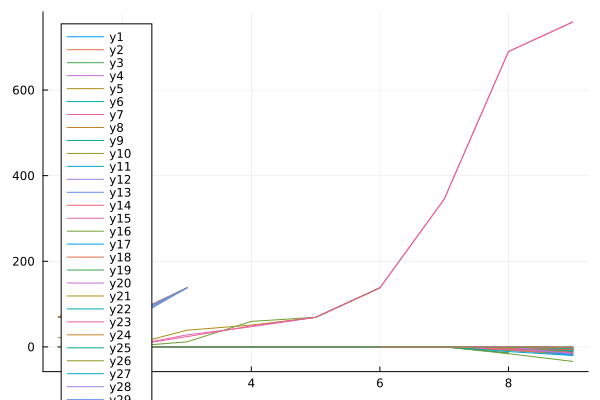

In [118]:
plot(vector_array)

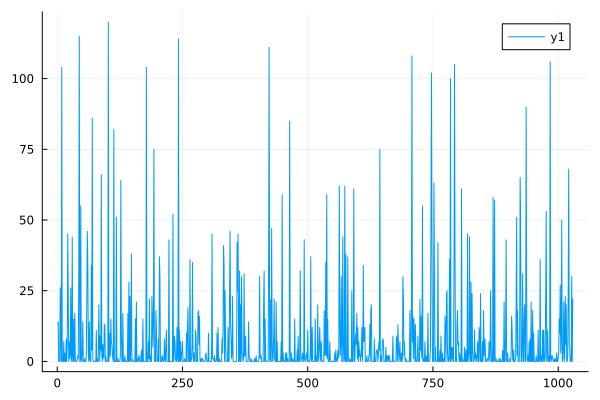

In [126]:
plot(sum.(collect(values(dict_int_Mon_counter_clockwise_timepoint))))

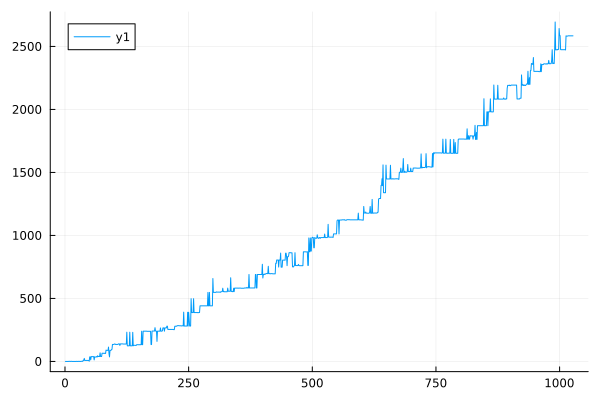

In [178]:
plot(buses_sent_array)

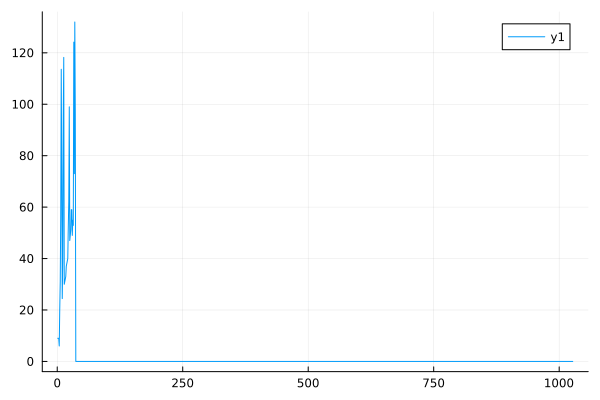

In [179]:
plot(sum.(people_left_array))

In [173]:
temp_total_demand_matrix_array[5]

9×9 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  NaN    NaN    NaN
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0  NaN
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0
 2.0  0.0  0.0  0.0  0.0  0.0    0.0    3.0    5.0
 1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0
 2.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0

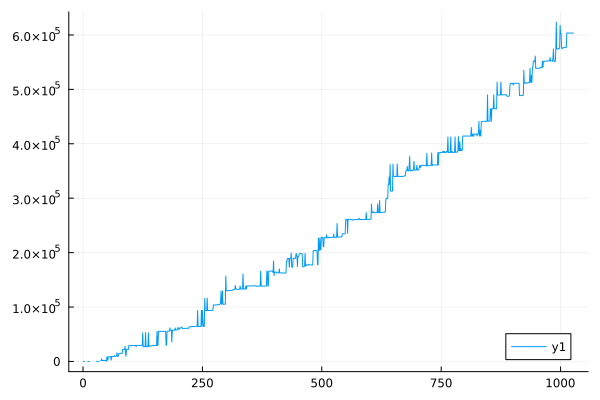

In [180]:
plot(sum.(collect(values(temp_total_demand_matrix_array))))

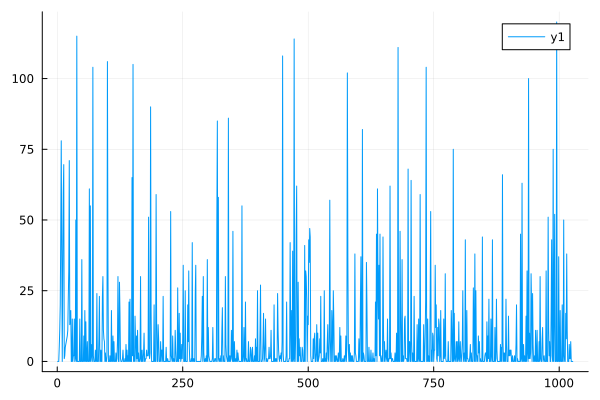

In [181]:
plot(sum.(collect(values(accumulation_matrix_t_array))))

In [140]:
findmax(buses_sent_array)

(16.0, 255)

In [137]:
for i in 1:length(buses_sent_array)
    if buses_sent_array[i] == 2
        println(i)
    end
end

641


In [154]:
dict_int_Mon_counter_clockwise_timepoint[255]

9×9 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0

In [153]:
temp_total_demand_matrix_array[255]

9×9 Matrix{Float64}:
   0.0   25.6286    4.46874   15.8726    0.0  …    0.0       0.0       0.0
 NaN    NaN       NaN        NaN       NaN       NaN       NaN       NaN
   0.0    0.0       0.0        0.0       0.0       0.0      71.2344   24.7817
   0.0    0.0       0.0        0.0       0.0      33.1561   30.149    24.7614
 NaN    NaN       NaN        NaN       NaN       NaN       NaN       NaN
   0.0    0.0       0.0        0.0       0.0  …    0.0      15.0      20.0
   3.0    0.0       0.0        0.0       0.0       0.0       3.0       5.0
   1.0    0.0       0.0        0.0       0.0       0.0       0.0       1.0
   0.0    0.0       0.0        0.0       0.0       0.0       0.0       0.0

In [157]:
accumulation_matrix_t_array[255]

9×9 Matrix{Float64}:
 0.0  37.5143  5.77143  20.2  0.0  37.5143   0.0   0.0   0.0
 0.0   0.0     0.0       0.0  0.0   0.0      0.0  15.0  20.0
 0.0   0.0     0.0       0.0  0.0   0.0      0.0  15.0  15.0
 0.0   0.0     0.0       0.0  0.0  12.5     12.5  12.5  12.5
 0.0   0.0     0.0       0.0  0.0   0.0      0.0   0.0   0.0
 0.0   0.0     0.0       0.0  0.0   0.0      0.0  15.0  20.0
 3.0   0.0     0.0       0.0  0.0   0.0      0.0   3.0   4.0
 1.0   0.0     0.0       0.0  0.0   0.0      0.0   0.0   0.0
 0.0   0.0     0.0       0.0  0.0   0.0      0.0   0.0   0.0